In [1]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.layers import Input
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model

Using TensorFlow backend.


In [2]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10 # number of outputs = number of digits
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
#define the ConvNet


In [3]:

def build(input_shape, classes):
    # CONV => RELU => POOL
    inp = Input(shape=(input_shape))
    x = Conv2D(20, (3, 3), padding="same",activation = 'relu')(inp)
    p1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    # CONV => RELU => POOL
    l2 = Conv2D(50, (3, 3),activation = 'relu')(p1)
    p2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(l2)
    # Flatten => RELU layers
    f = Flatten()(p2)
    d1 = Dense(500,activation = 'relu')(f)
    # a softmax classifier
    output = Dense(classes, activation='softmax')(d1)
    model = Model(inputs=inp, outputs=output)
    model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

    return model

In [4]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# k.set_image_dim_ordering("th")
# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:, :, :, np.newaxis]
print(X_train.shape)
X_test = X_test[:,:, :,  np.newaxis]
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

(60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# initialize the optimizer and model
model = build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)

history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.2127 - acc: 0.9354 - val_loss: 0.0620 - val_acc: 0.9799
Epoch 2/20
48000/48000 [==============================] - 51s 1ms/step - loss: 0.0554 - acc: 0.9826 - val_loss: 0.0472 - val_acc: 0.9854
Epoch 3/20
48000/48000 [==============================] - 46s 957us/step - loss: 0.0350 - acc: 0.9891 - val_loss: 0.0442 - val_acc: 0.9877
Epoch 4/20
48000/48000 [==============================] - 48s 1ms/step - loss: 0.0251 - acc: 0.9919 - val_loss: 0.0360 - val_acc: 0.9892
Epoch 5/20
48000/48000 [==============================] - 47s 980us/step - loss: 0.0195 - acc: 0.9935 - val_loss: 0.0348 - val_acc: 0.9901
Epoch 6/20
48000/48000 [==============================] - 46s 952us/step - loss: 0.0147 - acc: 0.9952 - val_loss: 0.0328 - val_acc: 0.9900
Epoch 7/20
48000/48000 [==============================] - 48s 993us/step - loss: 0.0102 - acc: 0.9965 - val_loss: 0.0404 -

In [6]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 4s 362us/step
Test score: 0.035850093289828695
Test accuracy: 0.9925


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


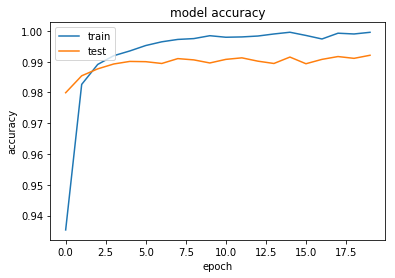

<Figure size 432x288 with 0 Axes>

In [11]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from pylab import savefig
savefig('val_acc.png', bbox_inches='tight')

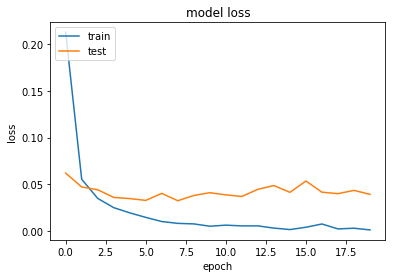

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()